In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [2]:
df = pd.read_csv("/Users/anchanghun/Downloads/DSA_features.csv")

In [3]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [4]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [5]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

Text(0, 0.5, 'Count')

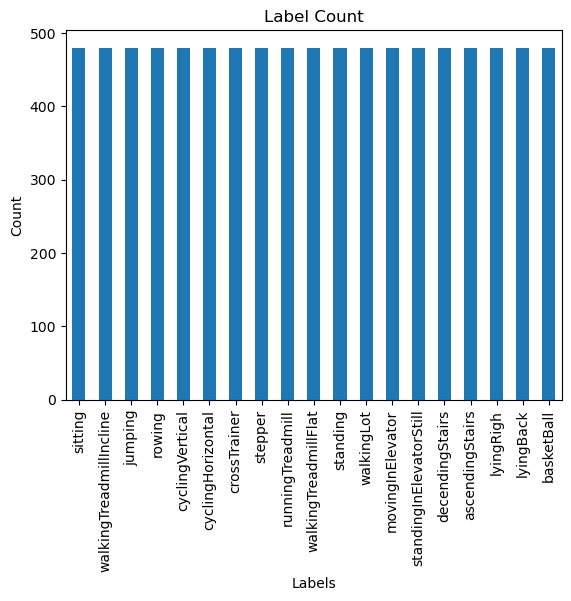

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [7]:
df_RA = df.filter(regex='RA_') 
df_LA = df.filter(regex='LA_') 

In [8]:
df_RA.insert(3, 'activity', df['activity'])

In [9]:
df_LA.insert(3, 'activity', df['activity'])

In [10]:
df_RA

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,activity,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,sitting,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,sitting,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,sitting,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,sitting,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,sitting,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.690373,30.46300,-4.90150,basketBall,47.192912,6.869710,0.650080,2.187710,41.3410,-10.1410,...,-0.89670,0.177217,0.420971,1.232819,-0.120793,0.58641,-0.61373,0.077901,0.279107,0.611462
9116,6.477090,48.54700,-9.96820,basketBall,44.135927,6.643488,1.675812,5.845459,33.7910,-48.3200,...,-0.85305,0.158099,0.397617,1.560701,-0.133269,0.51707,-0.52776,0.058400,0.241661,0.574120
9117,6.309986,27.29900,-8.43140,basketBall,57.018917,7.551087,0.108921,6.342772,27.0570,-6.6706,...,-0.83512,0.126188,0.355229,1.598340,-0.567238,-0.14483,-0.82409,0.023408,0.152998,0.598665
9118,5.020496,30.16600,-20.25100,basketBall,67.001032,8.185416,0.157547,5.824265,27.6300,-19.8830,...,-0.87361,0.174494,0.417725,0.758435,0.211566,0.67931,-0.22328,0.060114,0.245181,0.316989


In [11]:
df_LA

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,activity,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,sitting,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,sitting,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,sitting,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,sitting,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,sitting,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.834459,40.1640,-15.3980,basketBall,140.063928,11.834861,0.486128,-3.441297,39.7590,-53.6520,...,-0.87575,0.210911,0.459250,-0.421162,-0.529403,0.653000,-0.879310,0.123917,0.352018,1.813520
9116,6.647402,43.9160,-22.3060,basketBall,65.655140,8.102786,0.067916,-5.140474,26.7770,-41.9160,...,-0.77618,0.143162,0.378368,-1.307983,-0.466066,0.659650,-0.835960,0.167255,0.408968,1.483683
9117,3.108810,40.2770,-10.9500,basketBall,84.701543,9.203344,1.178224,-4.881662,43.4020,-27.3490,...,0.16648,0.035696,0.188933,-0.736037,-0.286489,0.632420,-0.837640,0.109532,0.330956,0.502392
9118,5.141190,68.5920,-43.1120,basketBall,137.860050,11.741382,1.219670,-3.365847,23.6960,-34.5820,...,-0.85130,0.205452,0.453268,0.171353,-0.567578,0.264780,-0.854420,0.059971,0.244890,1.467799


In [12]:
df_LA['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [13]:
df_RA['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])

/var/folders/lt/dt43ws7s4_z4rrsjwvzmwz740000gn/T/ipykernel_93605/3441972880.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])
/var/folders/lt/dt43ws7s4_z4rrsjwvzmwz740000gn/T/ipykernel_93605/3441972880.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])


In [15]:
df_LA['activity'].value_counts()

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [16]:
df_RA['activity'].value_counts()

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [17]:
df_RA_Y=df_RA['activity']

In [18]:
df_RA_X=df_RA.drop('activity',axis=1)
df_RA_X.head()

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,0.003779,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,0.001132,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,0.000488,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,0.001423,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,0.000471,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907


In [19]:
from sklearn.model_selection import train_test_split

X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(df_RA_X, 
                                                    df_RA_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [20]:
df_LA_Y = df_LA['activity']
df_LA_Y.head()

0    12
1    12
2    12
3    12
4    12
Name: activity, dtype: int64

In [21]:
df_LA_X=df_LA.drop('activity',axis=1)
df_LA_X.head()

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,LA_yacc_var,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,0.001178,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,0.001098,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,0.000684,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,0.001862,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,0.001061,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258


In [22]:
from sklearn.model_selection import train_test_split

X_train_LA, X_test_LA, y_train_LA, y_test_LA = train_test_split(df_LA_X, 
                                                    df_LA_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [23]:
X_train_RA.shape, X_test_RA.shape, y_train_RA.shape, y_test_RA.shape

((6840, 54), (2280, 54), (6840,), (2280,))

In [24]:
X_train_LA.shape, X_test_LA.shape, y_train_LA.shape, y_test_LA.shape

((6840, 54), (2280, 54), (6840,), (2280,))

In [25]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [26]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array_RA = np.array(y_train_RA)
train_set_RA = np.c_[X_train_RA, y_train_array_RA]

y_test_array_RA = np.array(y_test_RA)
test_set_RA = np.c_[X_test_RA, y_test_array_RA]

In [27]:
n_step = 3 

X_train_seq_RA, y_train_seq_RA = split_sequences(train_set_RA, n_step)
print(X_train_seq_RA.shape, y_train_seq_RA.shape)

X_test_seq_RA, y_test_seq_RA = split_sequences(test_set_RA, n_step)
print(X_test_seq_RA.shape, y_test_seq_RA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


In [28]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array_LA = np.array(y_train_LA)
train_set_LA = np.c_[X_train_LA, y_train_array_LA]

y_test_array_LA = np.array(y_test_LA)
test_set_LA = np.c_[X_test_LA, y_test_array_LA]

In [29]:
n_step = 3 

X_train_seq_LA, y_train_seq_LA = split_sequences(train_set_LA, n_step)
print(X_train_seq_LA.shape, y_train_seq_LA.shape)

X_test_seq_LA, y_test_seq_LA = split_sequences(test_set_LA, n_step)
print(X_test_seq_LA.shape, y_test_seq_LA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


In [30]:
from keras.utils import to_categorical

# Convert output variables to categorical for CNN
y_train_seq_RA = to_categorical(y_train_seq_RA)
print(y_train_seq_RA.shape)

y_test_seq_RA = to_categorical(y_test_seq_RA)
print(y_test_seq_RA.shape)

(6838, 19)
(2278, 19)


In [31]:
# Convert output variables to categorical for CNN
y_train_seq_LA = to_categorical(y_train_seq_LA)
print(y_train_seq_LA.shape)

y_test_seq_LA = to_categorical(y_test_seq_LA)
print(y_test_seq_LA.shape)

(6838, 19)
(2278, 19)


In [32]:
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq_RA.shape[1], X_train_seq_RA.shape[2], y_train_seq_RA.shape[1]
print(n_timesteps, n_features, n_outputs)

3 54 19


In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D


In [34]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               93696     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 19)                2451      
                                                                 
Total params: 112659 (440.07 KB)
Trainable params: 112659 (440.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
history = model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 [==============================] - 1s 3ms/step - loss: 2.0608 - accuracy: 0.3386 - val_loss: 1.3443 - val_accuracy: 0.5614
Epoch 2/20
193/193 [==============================] - 0s 2ms/step - loss: 1.0566 - accuracy: 0.6657 - val_loss: 1.0136 - val_accuracy: 0.7003
Epoch 3/20
193/193 [==============================] - 0s 2ms/step - loss: 0.7516 - accuracy: 0.7801 - val_loss: 0.8050 - val_accuracy: 0.7778
Epoch 4/20
193/193 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.8261 - val_loss: 0.6809 - val_accuracy: 0.8392
Epoch 5/20
193/193 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.8627 - val_loss: 0.6889 - val_accuracy: 0.8202
Epoch 6/20
193/193 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8848 - val_loss: 0.6773 - val_accuracy: 0.8304
Epoch 7/20
193/193 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.9085 - val_loss: 0.6774 - val_accuracy: 0.8187
Epoch 

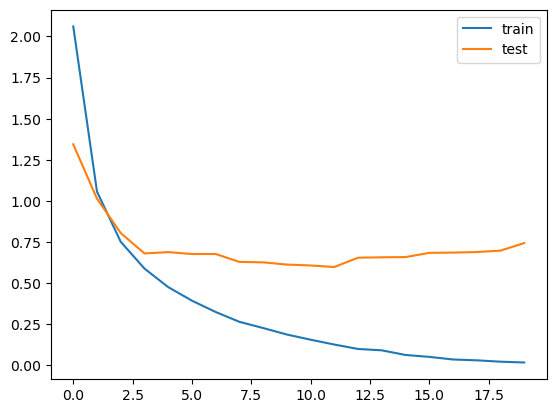

In [37]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [38]:
model.evaluate(X_train_seq_RA, y_train_seq_RA)

214/214 [==============================] - 0s 928us/step - loss: 0.0924 - accuracy: 0.9835


[0.09243755042552948, 0.9834746718406677]

In [39]:
model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 662us/step - loss: 0.6062 - accuracy: 0.8775


[0.6062169671058655, 0.8775241374969482]

72/72 [==============================] - 0s 640us/step
Confusion Matrix


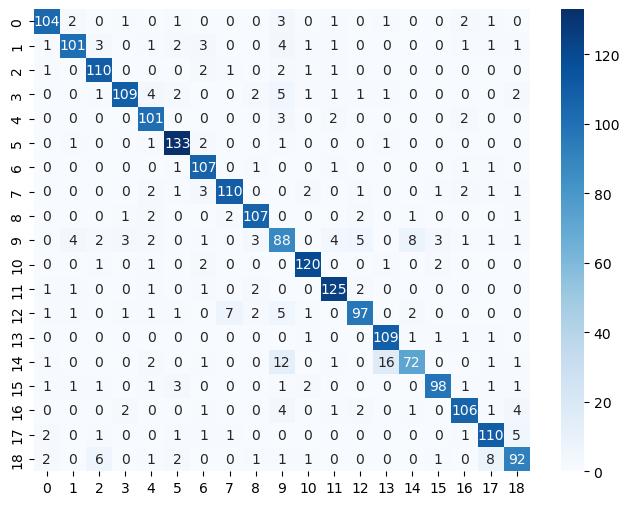

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_RA, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq_RA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [41]:
base_loss,base_accuracy=model.evaluate(X_test_seq_RA, y_test_seq_RA)

model_file='/Users/anchanghun/Downloads/RA_Model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 [==============================] - 0s 706us/step - loss: 0.6062 - accuracy: 0.8775
model saved at  /Users/anchanghun/Downloads/RA_Model.h5
Accuracy >87.752414
Base Loss >0.61


/var/folders/lt/dt43ws7s4_z4rrsjwvzmwz740000gn/T/ipykernel_93605/3175008016.py:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, model_file, include_optimizer=False)


In [42]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model2 = Sequential()
model2.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [43]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               93696     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 19)                2451      
                                                                 
Total params: 112659 (440.07 KB)
Trainable params: 112659 (440.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
history2 = model2.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 [==============================] - 1s 3ms/step - loss: 2.0129 - accuracy: 0.3728 - val_loss: 1.2805 - val_accuracy: 0.5673
Epoch 2/20
193/193 [==============================] - 0s 2ms/step - loss: 0.9762 - accuracy: 0.6865 - val_loss: 0.8286 - val_accuracy: 0.7558
Epoch 3/20
193/193 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.7881 - val_loss: 0.7161 - val_accuracy: 0.7807
Epoch 4/20
193/193 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.8422 - val_loss: 0.6259 - val_accuracy: 0.8246
Epoch 5/20
193/193 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8702 - val_loss: 0.5444 - val_accuracy: 0.8465
Epoch 6/20
193/193 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8970 - val_loss: 0.5182 - val_accuracy: 0.8582
Epoch 7/20
193/193 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.9127 - val_loss: 0.5171 - val_accuracy: 0.8626
Epoch 

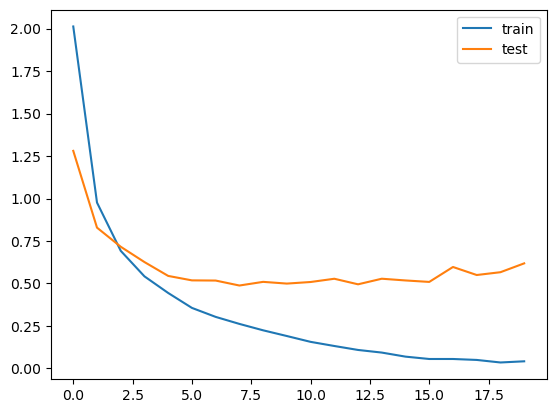

In [45]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "test")
plt.legend()

In [46]:
model2.evaluate(X_train_seq_LA, y_train_seq_LA)

214/214 [==============================] - 0s 966us/step - loss: 0.1001 - accuracy: 0.9762


[0.10005654394626617, 0.9761626124382019]

In [47]:
model2.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 1ms/step - loss: 0.6345 - accuracy: 0.8709


[0.6345276236534119, 0.8709394335746765]

72/72 [==============================] - 0s 673us/step
Confusion Matrix


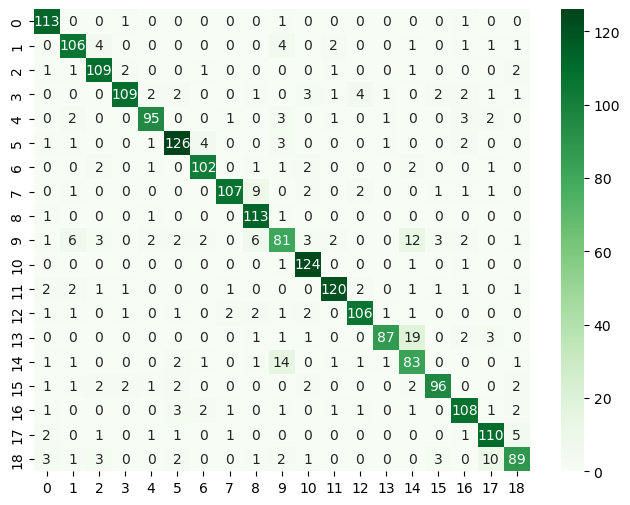

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_LA, axis=1)
Y_pred = np.argmax(model2.predict(X_test_seq_LA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

# 그래프 표시
plt.show()

In [49]:
base_loss,base_accuracy=model2.evaluate(X_test_seq_LA, y_test_seq_LA)

model_file2='/Users/anchanghun/Downloads/LA_Model.h5'
  
tf.keras.models.save_model(model2, model_file2, include_optimizer=False)
print('model saved at ', model_file2)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 [==============================] - 0s 985us/step - loss: 0.6345 - accuracy: 0.8709
model saved at  /Users/anchanghun/Downloads/LA_Model.h5
Accuracy >87.093943
Base Loss >0.63


/var/folders/lt/dt43ws7s4_z4rrsjwvzmwz740000gn/T/ipykernel_93605/2788076568.py:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model2, model_file2, include_optimizer=False)


<font size="7">전이 학습 및 미세 조정 </font>

 ### LA모델 -> RA 데이터

In [50]:
# https://www.tensorflow.org/guide/keras/transfer_learning?hl=ko

In [51]:
# Base 모델을 로드 (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file2)

In [52]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 705us/step - loss: 0.6345 - accuracy: 0.8709


[0.6345276236534119, 0.8709394335746765]

In [53]:
base_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 731us/step - loss: 5.7668 - accuracy: 0.2599


[5.766798973083496, 0.25987708568573]

In [54]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


In [55]:
# 기존 출력층을 제거 (마지막 레이어 pop)
base_model.layers.pop()

# 모델을 새로운 입력 및 출력으로 재정의
from tensorflow.keras import Model
base_model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)


In [56]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(64, activation='relu'))  # 기존 출력층 앞의 레이어 대신 추가

# 최종 출력층 추가 (예: 10개의 클래스)
new_model.add(layers.Dense(19, activation='softmax'))

new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 19)                112659    
                                                                 
 dense_4 (Dense)             (None, 64)                1280      
                                                                 
 dense_5 (Dense)             (None, 19)                1235      
                                                                 
Total params: 115174 (449.90 KB)
Trainable params: 2515 (9.82 KB)
Non-trainable params: 112659 (440.07 KB)
_________________________________________________________________


In [57]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.functional.Functional object...,model,False
1,<keras.src.layers.core.dense.Dense object at 0...,dense_4,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense_5,True


In [58]:
history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 1s 2ms/step - loss: 2.7012 - accuracy: 0.2853 - val_loss: 2.4405 - val_accuracy: 0.3377
Epoch 2/20
193/193 [==============================] - 0s 926us/step - loss: 2.2289 - accuracy: 0.3681 - val_loss: 2.0916 - val_accuracy: 0.3772
Epoch 3/20
193/193 [==============================] - 0s 898us/step - loss: 2.0575 - accuracy: 0.3716 - val_loss: 2.0145 - val_accuracy: 0.3816
Epoch 4/20
193/193 [==============================] - 0s 914us/step - loss: 2.0139 - accuracy: 0.3742 - val_loss: 1.9906 - val_accuracy: 0.3889
Epoch 5/20
193/193 [==============================] - 0s 907us/step - loss: 1.9968 - accuracy: 0.3788 - val_loss: 1.9790 - val_accuracy: 0.3904
Epoch 6/20
193/193 [==============================] - 0s 877us/step - loss: 1.9865 - accuracy: 0.3827 - val_loss: 1.9640 - val_accuracy: 0.3962
Epoch 7/20
193/193 [==============================] - 0s 911us/step - loss: 1.9780 - accuracy: 0.3851 - val_loss: 1.9625 - val_accuracy: 0

In [59]:
new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 766us/step - loss: 1.9739 - accuracy: 0.3903


[1.9739209413528442, 0.3902546167373657]

### 미세조정

In [60]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [61]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.functional.Functional object...,model,True
1,<keras.src.layers.core.dense.Dense object at 0...,dense_4,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense_5,True


In [62]:
history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 1s 3ms/step - loss: 1.5350 - accuracy: 0.5071 - val_loss: 1.3329 - val_accuracy: 0.5716
Epoch 2/20
193/193 [==============================] - 0s 2ms/step - loss: 1.1704 - accuracy: 0.6287 - val_loss: 1.1279 - val_accuracy: 0.6520
Epoch 3/20
193/193 [==============================] - 0s 2ms/step - loss: 0.9637 - accuracy: 0.7114 - val_loss: 1.0033 - val_accuracy: 0.7135
Epoch 4/20
193/193 [==============================] - 0s 2ms/step - loss: 0.7973 - accuracy: 0.7732 - val_loss: 0.9259 - val_accuracy: 0.7588
Epoch 5/20
193/193 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.8130 - val_loss: 0.8407 - val_accuracy: 0.7924
Epoch 6/20
193/193 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.8409 - val_loss: 0.8310 - val_accuracy: 0.8041
Epoch 7/20
193/193 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.8635 - val_loss: 0.8324 - val_accuracy: 0.8070
Epoch 

In [63]:
new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 731us/step - loss: 0.7400 - accuracy: 0.8420


[0.7399520874023438, 0.8419666290283203]

### RA 모델 -> LA

In [64]:
# RA 모델을 로드 (RA_Model.h5)
base_model = load_model(model_file) 

# 기존 출력층을 제거 (마지막 레이어 pop)
base_model.layers.pop()

# 모델을 새로운 입력 및 출력으로 재정의
from tensorflow.keras import Model

base_model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

In [65]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

# 새로운 모델을 정의
new_model_RA = Sequential()

# 기존 모델을 추가
new_model_RA.add(base_model)

# 새로운 완전연결층 추가
new_model_RA.add(layers.Dense(64, activation='relu'))

# 최종 출력층 추가 (예: 19개의 클래스)
new_model_RA.add(layers.Dense(19, activation='softmax'))

# 새로운 모델 컴파일
new_model_RA.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model_RA.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 19)                112659    
                                                                 
 dense_6 (Dense)             (None, 64)                1280      
                                                                 
 dense_7 (Dense)             (None, 19)                1235      
                                                                 
Total params: 115174 (449.90 KB)
Trainable params: 2515 (9.82 KB)
Non-trainable params: 112659 (440.07 KB)
_________________________________________________________________


In [66]:
# 전이 학습 (기존 RA 모델에서 LA 데이터로 전이)
history4 = new_model_RA.fit(X_train_seq_LA, y_train_seq_LA, epochs=20, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/20
193/193 [==============================] - 1s 2ms/step - loss: 2.7422 - accuracy: 0.2519 - val_loss: 2.4570 - val_accuracy: 0.3333
Epoch 2/20
193/193 [==============================] - 0s 874us/step - loss: 2.2765 - accuracy: 0.3360 - val_loss: 2.1105 - val_accuracy: 0.3772
Epoch 3/20
193/193 [==============================] - 0s 879us/step - loss: 2.0994 - accuracy: 0.3531 - val_loss: 2.0237 - val_accuracy: 0.3977
Epoch 4/20
193/193 [==============================] - 0s 862us/step - loss: 2.0519 - accuracy: 0.3619 - val_loss: 1.9987 - val_accuracy: 0.3947
Epoch 5/20
193/193 [==============================] - 0s 866us/step - loss: 2.0291 - accuracy: 0.3658 - val_loss: 1.9795 - val_accuracy: 0.3977
Epoch 6/20
193/193 [==============================] - 0s 860us/step - loss: 2.0147 - accuracy: 0.3671 - val_loss: 1.9689 - val_accuracy: 0.3918
Epoch 7/20
193/193 [==============================] - 0s 869us/step - loss: 2.0053 - accuracy: 0.3674 - val_loss: 1.9604 - val_accuracy: 0

In [67]:
# 최종 모델 평가 (LA 데이터)
new_model_RA.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 702us/step - loss: 2.0233 - accuracy: 0.3802


[2.0232622623443604, 0.38015803694725037]

### 미세 조정

In [68]:
base_model.trainable = True
new_model_RA.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')


In [69]:
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.functional.Functional object...,model,True
1,<keras.src.layers.core.dense.Dense object at 0...,dense_4,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense_5,True


In [70]:
history4 = new_model_RA.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model_RA.summary()

Epoch 1/20
193/193 [==============================] - 1s 3ms/step - loss: 1.5652 - accuracy: 0.5060 - val_loss: 1.4302 - val_accuracy: 0.5614
Epoch 2/20
193/193 [==============================] - 0s 2ms/step - loss: 1.1629 - accuracy: 0.6419 - val_loss: 1.1076 - val_accuracy: 0.6637
Epoch 3/20
193/193 [==============================] - 0s 2ms/step - loss: 0.9060 - accuracy: 0.7330 - val_loss: 0.9745 - val_accuracy: 0.7193
Epoch 4/20
193/193 [==============================] - 0s 2ms/step - loss: 0.7723 - accuracy: 0.7866 - val_loss: 0.9895 - val_accuracy: 0.7471
Epoch 5/20
193/193 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.8339 - val_loss: 0.7761 - val_accuracy: 0.8012
Epoch 6/20
193/193 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.8549 - val_loss: 0.7248 - val_accuracy: 0.8114
Epoch 7/20
193/193 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.8815 - val_loss: 0.6921 - val_accuracy: 0.8246
Epoch 

In [71]:
# 최종 모델 평가 (LA 데이터)
new_model_RA.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 703us/step - loss: 0.7042 - accuracy: 0.8547


[0.7041813731193542, 0.8546971082687378]

### 출력층 제거안하고 evaluate 할시에 4개의 값이 나옴 -> 결과가 왜곡되었음을 알 수 있다.
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8418 - loss: 0.0000e+00
[0.0, 0.0, 0.8384547829627991, 0.8384547829627991]

### 왼손을 학습한 모델에 오른손 데이터를 학습시키면 결과가 당연히 안좋음 -> 두 데이터의 특성이 다르기 때문
### 미세 조정을 하면 원래 모델과 비슷하지만 낮은 성능을 보여준다.


순서

1.	기존의 사전 학습된 모델을 로드

2.	모델의 일부 또는 전체 가중치를 동결하거나, 새로운 출력층을 추가

3.	새로운 데이터에 맞춰 **출력층을 학습**

4.	**미세 조정**을 통해 기존 모델의 가중치도 새로운 데이터에 맞춰 학습

**미세 조정**을 통해 기존 모델의 가중치도 새로운 데이터에 맞춰 학습

이미 학습된 가중치를 사용하므로, 기존 모델이 가지고 있는 지식을 활용해 빠른 학습

새로운 데이터가 적을 때도 좋은 성능을 낼 수 있다. 기존 모델이 이미 다양한 데이터를 학습했기 때문에 새로운 데이터에 대한 일반화 능력을 빠르게 얻을 수 있다.

새로운 데이터가 기존 데이터와 유사하거나 구조가 비슷한 경우, 미세 조정된 모델이 처음부터 학습한 모델보다 더 나은 성능기대 가능
